In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

/Users/theoeg/.pyenv/versions/3.10.14/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04648536,  0.06363454, -0.03407554, ...,  0.03249408,
        -0.03783653, -0.02636042],
       [-0.02744603, -0.0526034 ,  0.00123911, ...,  0.01960827,
         0.02636679,  0.06200162],
       [ 0.06999899, -0.00230314, -0.02978826, ..., -0.04918851,
        -0.0536707 ,  0.02473271],
       ...,
       [ 0.02243347,  0.06603496,  0.06492452, ...,  0.05520435,
         0.06791373, -0.03048144],
       [ 0.06965052,  0.05668537,  0.00897913, ..., -0.018792  ,
         0.00735945, -0.04707594],
       [ 0.05454396, -0.01887386, -0.02567551, ...,  0.00159449,
         0.03998745, -0.0462324 ]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [17]:
 history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.7682 - loss: 0.7165 - val_accuracy: 0.8292 - val_loss: 0.5111
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8315 - loss: 0.4867 - val_accuracy: 0.8440 - val_loss: 0.4501
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8439 - loss: 0.4438 - val_accuracy: 0.8600 - val_loss: 0.4129
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8531 - loss: 0.4152 - val_accuracy: 0.8560 - val_loss: 0.4135
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8612 - loss: 0.3954 - val_accuracy: 0.8654 - val_loss: 0.3845
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8657 - loss: 0.3795 - val_accuracy: 0.8666 - val_loss: 0.3940
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8707 - loss: 0.3655 - val_accuracy: 0.8684 - val_loss: 0.3691
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8737 -

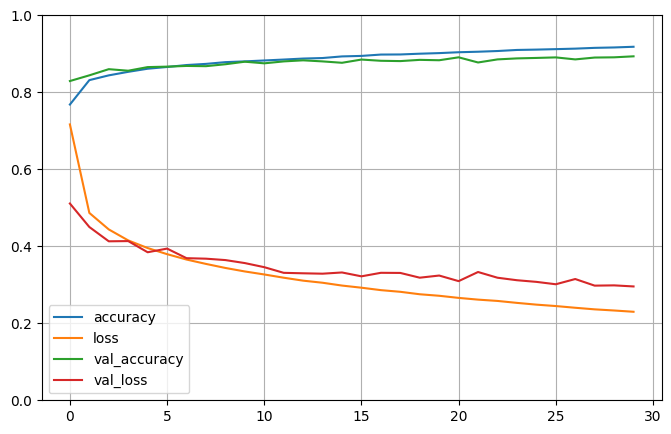

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
X_test = X_test / 255.0 
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8839 - loss: 0.3257


[0.3256722688674927, 0.883899986743927]

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)